# Bulldozer competition from kaggle to predict the sales price on auction. The model will be implemented in a little FLASK app

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [5]:
#!kaggle competitions download -c bluebook-for-bulldozers

 97%|████████████████████████████████████▊ | 47.0M/48.4M [00:01<00:00, 52.2MB/s]
100%|██████████████████████████████████████| 48.4M/48.4M [00:01<00:00, 34.5MB/s]


In [2]:
!ls

KAGGLE_Bulldozer.ipynb README.md


In [2]:
dataPathTrain = "/Users/larsjuhl/Machine-Learning/5_Projects/data/bluebook-for-bulldozers/TrainAndValid.csv"
dataPathTest = "/Users/larsjuhl/Machine-Learning/5_Projects/data/bluebook-for-bulldozers/Test.csv"

Import the data and convert the sales date into "datetime" type

In [3]:
dfTrain = pd.read_csv(dataPathTrain, low_memory=False, parse_dates = ["saledate"])
dfTest = pd.read_csv(dataPathTest, low_memory=False, parse_dates = ["saledate"])

In [4]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

Check which columns has missing values

In [5]:
dfTrain.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

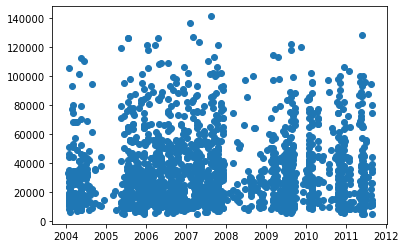

In [6]:
fig, ax = plt.subplots()
ax.scatter(dfTrain.saledate[:2000], dfTrain.SalePrice[:2000])

<AxesSubplot:ylabel='Frequency'>

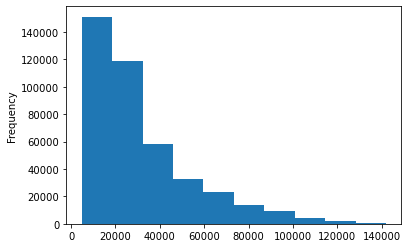

In [7]:
dfTrain.SalePrice.plot.hist()

## Feature engineering

In [8]:
df_tmp = dfTrain.copy()

In [9]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [10]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [11]:
df_tmp.drop("saledate", axis=1, inplace=True)

In [12]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [13]:
## Convert strings to categories

for feature, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[feature] = content.astype("category").cat.as_ordered()

In [14]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [15]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [16]:
## Find missing values in features

for feature, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(feature)

auctioneerID
MachineHoursCurrentMeter


In [17]:
## Fill missing values with median in numeric type

for feature, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[feature+"_isMissing"] = pd.isnull(content)
            df_tmp[feature] = content.fillna(content.median)

In [18]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 59 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   SalesID                             412698 non-null  int64   
 1   SalePrice                           412698 non-null  float64 
 2   MachineID                           412698 non-null  int64   
 3   ModelID                             412698 non-null  int64   
 4   datasource                          412698 non-null  int64   
 5   auctioneerID                        412698 non-null  object  
 6   YearMade                            412698 non-null  int64   
 7   MachineHoursCurrentMeter            412698 non-null  object  
 8   UsageBand                           73670 non-null   category
 9   fiModelDesc                         412698 non-null  category
 10  fiBaseModel                         412698 non-null  category
 11  fiSecondaryDe

In [19]:
df_tmp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

In [20]:
# Fill missing values for categorical variables into numbers

for feature, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(feature)

auctioneerID
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [21]:
for feature, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[feature+"isMissing"] = pd.isnull(content)
        df_tmp[feature] = pd.Categorical(content).codes+1

In [22]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_MountingisMissing,True,True,True,True,True
Blade_TypeisMissing,True,True,True,True,True
Travel_ControlsisMissing,True,True,True,True,True
Differential_TypeisMissing,False,False,True,True,True


In [23]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 105 entries, SalesID to Steering_ControlsisMissing
dtypes: bool(48), float64(1), int16(5), int64(10), int8(41)
memory usage: 73.6 MB


In [24]:
df_tmp.isna().sum()

SalesID                       0
SalePrice                     0
MachineID                     0
ModelID                       0
datasource                    0
                             ..
Backhoe_MountingisMissing     0
Blade_TypeisMissing           0
Travel_ControlsisMissing      0
Differential_TypeisMissing    0
Steering_ControlsisMissing    0
Length: 105, dtype: int64

In [25]:
df_tmp.shape

(412698, 105)

### All the data is now numeric and there are no missing values

## Model development

In [26]:
# Split data into train and validation set
# According to the KAGGLE competition validationset is from 2012, so we split the data from there. 

df_Validation = df_tmp[df_tmp.saleYear == 2012]
df_Train = df_tmp[df_tmp.saleYear != 2012]

len(df_Validation), len(df_Train)

(11573, 401125)

In [27]:
df_Validation.saleYear.head(5)

401125    2012
401126    2012
401127    2012
401128    2012
401129    2012
Name: saleYear, dtype: int64

In [28]:
df_Train.saleYear.head(5)

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [29]:
# Split Training data into X og Y

X_train, Y_train = df_Train.drop("SalePrice", axis=1), df_Train.SalePrice
X_val, Y_val = df_Validation.drop("SalePrice", axis=1), df_Validation.SalePrice

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((401125, 104), (401125,), (11573, 104), (11573,))

In [30]:
# Define RMSLE for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(sklearn.metrics.mean_squared_log_error(y_test, y_preds))

# Create evaluate function
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(Y_train, train_preds),
              "Valid MAE": mean_absolute_error(Y_val, val_preds),
              "Training RMSLE": rmsle(Y_train, train_preds),
              "Valid RMSLE": rmsle(Y_val, val_preds),
    return scores

In [31]:
%%time

# Build RandomForestRegressor ML Model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=25)

model.fit(X_train, Y_train)

CPU times: user 1min 1s, sys: 704 ms, total: 1min 2s
Wall time: 9.55 s


RandomForestRegressor(max_samples=20000, n_jobs=-1, random_state=25)

In [32]:
show_scores(model)

{'Training MAE': 5055.33682809598,
 'Valid MAE': 6774.596092629397,
 'Training RMSLE': 0.23674692909860584,
 'Valid RMSLE': 0.27738045935870387,
 "Trainig R'2": 0.8827890687662724,
 "Valid R'2": 0.8477150212135831}

In [38]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 7, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_samples": [20000]}

rs_model = RandomizedSearchCV(estimator=model, param_distributions=rf_grid, n_iter=20, n_jobs=-1, cv=5, verbose=True)

UsageError: Line magic function `%%time` not found.


In [36]:
rs_model.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_samples=20000, n_jobs=-1,
                                                   random_state=25),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 7, 10],
                                        'max_samples': [20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [42]:
rs_model.best_params_


({'n_estimators': 50,
  'min_samples_split': 18,
  'min_samples_leaf': 7,
  'max_samples': 20000,
  'max_depth': None},
 0.7259206819021528)

In [37]:
show_scores(rs_model)

{'Training MAE': 5536.29642039738,
 'Valid MAE': 7140.828430470742,
 'Training RMSLE': 0.2552162124227855,
 'Valid RMSLE': 0.2878149688112739,
 "Trainig R'2": 0.8582143910278464,
 "Valid R'2": 0.825670311206003}

In [53]:
# Best model 

best_model = RandomForestRegressor(n_estimators=50,
                                   min_samples_split=18,
                                   min_samples_leaf=7,
                                   max_features=0.5,
                                   max_samples=None,
                                   max_depth=None,
                                   n_jobs=-1,
                                   random_state=25)

best_model.fit(X_train, Y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=7,
                      min_samples_split=18, n_estimators=50, n_jobs=-1,
                      random_state=25)

In [54]:
show_scores(best_model)

{'Training MAE': 3636.5758630703,
 'Valid MAE': 5994.738194752015,
 'Training RMSLE': 0.17579869957999258,
 'Valid RMSLE': 0.2455497017859978,
 "Trainig R'2": 0.9364758470311781,
 "Valid R'2": 0.8775454953115644}

In [ ]:
## This further improved the model from 0.2878 to 0.2455. This model will be implemented in the flask app.  

# Test the model on the Test data

In [93]:
df_test_tmp = dfTest.copy()

In [94]:
# Clean test data (Same as for train data)
def cleaningFunction (df):  
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)

    for feature, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[feature] = content.astype("category").cat.as_ordered()

    for feature, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[feature+"_isMissing"] = pd.isnull(content)
                df[feature] = content.fillna(content.median)

    for feature, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[feature+"isMissing"] = pd.isnull(content)
            df[feature] = pd.Categorical(content).codes+1
            
    return df

In [95]:
cleaningFunction(df_test_tmp)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_WidthisMissing,Stick_LengthisMissing,ThumbisMissing,Pattern_ChangerisMissing,Grouser_TypeisMissing,Backhoe_MountingisMissing,Blade_TypeisMissing,Travel_ControlsisMissing,Differential_TypeisMissing,Steering_ControlsisMissing
0,1227829,1006309,3168,121,3,1999,1,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,2,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,3,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,4,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,5,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,1347,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,1347,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,1347,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,1347,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [96]:
df_test_tmp.head(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_WidthisMissing,Stick_LengthisMissing,ThumbisMissing,Pattern_ChangerisMissing,Grouser_TypeisMissing,Backhoe_MountingisMissing,Blade_TypeisMissing,Travel_ControlsisMissing,Differential_TypeisMissing,Steering_ControlsisMissing
0,1227829,1006309,3168,121,3,1999,1,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,2,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,3,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,4,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,5,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [98]:
X_train.head(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_WidthisMissing,Stick_LengthisMissing,ThumbisMissing,Pattern_ChangerisMissing,Grouser_TypeisMissing,Backhoe_MountingisMissing,Blade_TypeisMissing,Travel_ControlsisMissing,Differential_TypeisMissing,Steering_ControlsisMissing
0,1139246,999089,3157,121,1,2004,1,2,963,298,...,True,True,True,True,True,True,True,True,False,False
1,1139248,117657,77,121,1,1996,2,2,1745,529,...,True,True,True,True,True,True,True,True,False,False
2,1139249,434808,7009,121,1,2001,3,1,336,111,...,True,True,True,True,True,True,True,True,True,True
3,1139251,1026470,332,121,1,2001,4,1,3716,1381,...,True,True,True,True,True,True,True,True,True,True
4,1139253,1057373,17311,121,1,2007,5,3,4261,1538,...,True,True,True,True,True,True,True,True,True,True


In [99]:
set(X_train.columns) - set(df_test_tmp.columns)

{'auctioneerID_isMissing', 'auctioneerIDisMissing'}

In [100]:
## Add these missing columns so it matches the input for the model

df_test_tmp["auctioneerID_isMissing"] = False
df_test_tmp["auctioneerIDisMissing"] = False

In [101]:
set(X_train.columns) - set(df_test_tmp.columns)

set()

# Prediction

In [102]:
test_pred = best_model.predict(df_test_tmp)

In [106]:
test_pred.shape, test_pred[0]

((12457,), 19926.133812175645)

In [108]:
# Add Result and sales ID to Dataframe

df_pred = pd.DataFrame()
df_pred["SalesID"] = df_test_tmp.SalesID
df_pred["SalesPrice"] = test_pred

In [110]:
df_pred

,SalesID,SalesPrice
0,1227829,19926.133812
1,1227844,19806.556104
2,1227847,51595.441771
3,1227848,70452.102746
4,1227863,43645.578247
...,...,...
12452,6643171,37864.030504
12453,6643173,14605.501814
12454,6643184,15578.868076
12455,6643186,17688.027867


In [125]:
# Feature importance

featureImportance = best_model.feature_importances_

df_featureImportance = pd.DataFrame()
df_featureImportance["Feature"] = df_test_tmp.columns
df_featureImportance["Importance"] = featureImportance

In [136]:
df_featureImportance.head(5)

,Feature,Importance
0,SalesID,0.031053
1,MachineID,0.013705
2,ModelID,0.039639
3,datasource,0.001433
4,auctioneerID,0.002325


In [155]:
# Sort it and display the 20 most important features
df_featureImportance = df_featureImportance.sort_values(by="Importance", ascending=False).head(20)

In [177]:
df_featureImportance.head(20)

,Feature,Importance
5,YearMade,0.211021
13,ProductSize,0.154235
51,saleYear,0.073383
19,Enclosure,0.069458
10,fiSecondaryDesc,0.065706
9,fiBaseModel,0.049534
14,fiProductClassDesc,0.044592
8,fiModelDesc,0.043480
2,ModelID,0.039639
66,stateisMissing,0.033014


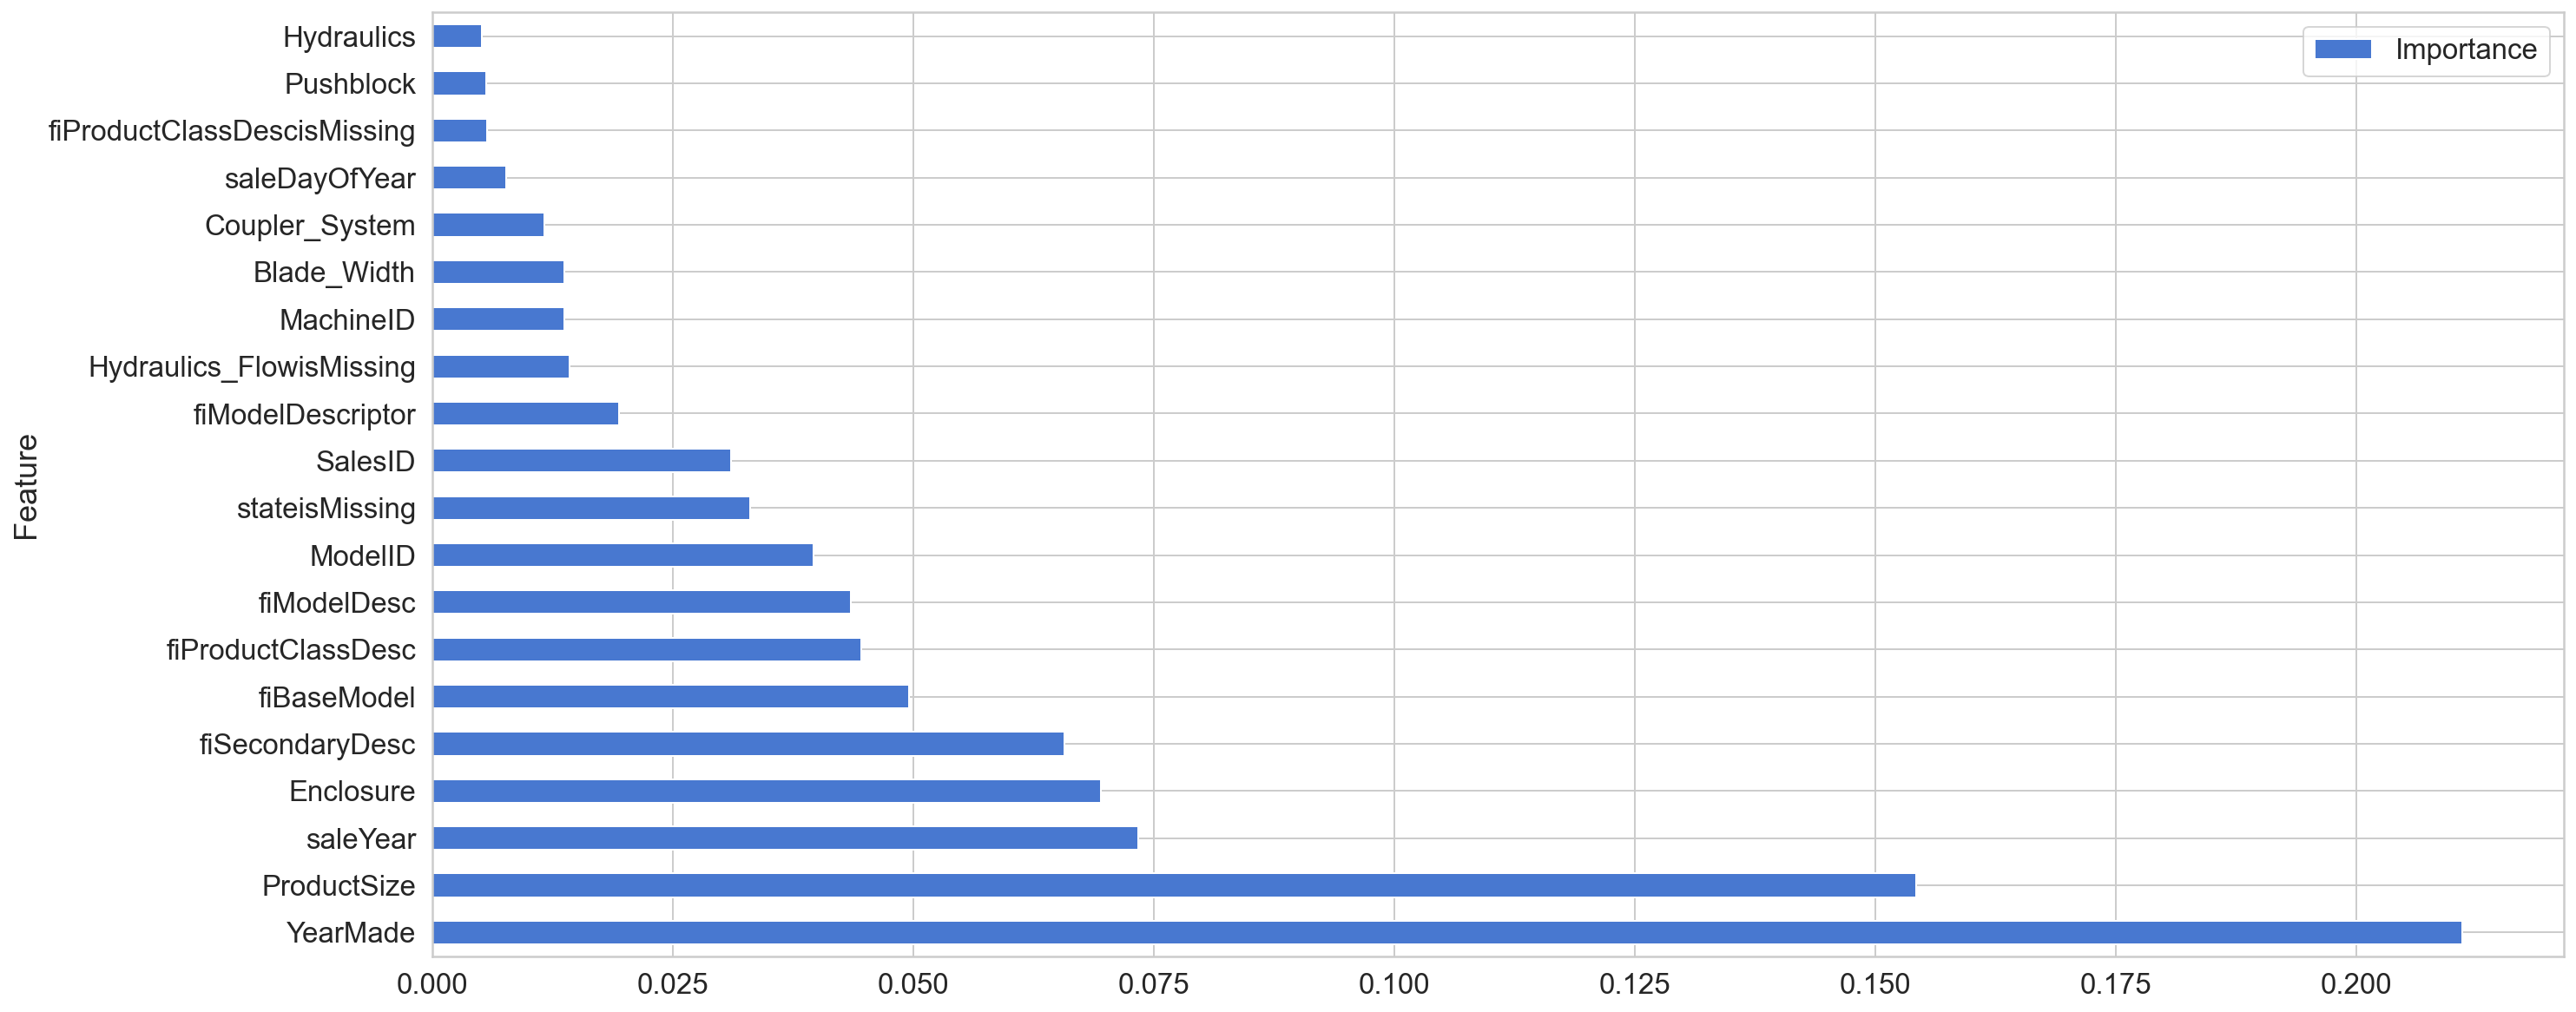

In [176]:
ax = df_featureImportance.plot.barh(x='Feature', y='Importance')

In [181]:
# Export "best_model" and the "df_test_tmp" data to CSV. This is used for the FLASK APP
import joblib

#df_test_tmp.to_csv("testDataForModel.csv", index=False)
joblib.dump(best_model, 'bestmodel.joblib')

['bestmodel.joblib']

In [184]:
newModel = joblib.load("bestmodel.joblib")
data = pd.read_csv("testDataForModel.csv")

In [189]:
data[0:1]

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,ThumbisMissing,Pattern_ChangerisMissing,Grouser_TypeisMissing,Backhoe_MountingisMissing,Blade_TypeisMissing,Travel_ControlsisMissing,Differential_TypeisMissing,Steering_ControlsisMissing,auctioneerID_isMissing,auctioneerIDisMissing
0,1227829,1006309,3168,121,3,1999,1,2,499,180,...,True,True,True,True,True,True,True,True,False,False


In [190]:
newModel.predict(data[5:6])

array([33854.18235115])

In [194]:
data.SalesID[4:5]

4    1227863
Name: SalesID, dtype: int64